In [1]:
#### 階層式集群分析 HCPC ####

In [2]:
gc()

#設定工作目錄
setwd("/Users/huangyiling/GitHub/EB101_TeamSpade_project/DataModel/dish_Model1")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,519462,27.8,1163017,62.2,642320,34.4
Vcells,986950,7.6,8388608,64.0,1774282,13.6


In [3]:
#安裝必要套件
# install.packages("FactoMineR")
# install.packages("factoextra")

In [4]:
# 載入必要 R 套件
library(factoextra)
library(FactoMineR)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [5]:
data_all<-read.csv("dishNu_combind.csv")
head(data_all)

X.1,X,r_id,recipe,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
1,1,10000001,蝦肉蔬菜煎米餅,-1.8338063,-0.1185669,0.3019148,0.40157698,0.1332482,0.11774141,0.2835635,0.10454894
2,2,10000002,安柏m龍貓可愛造型便當,-0.5855170,-0.4958202,-0.6075954,-1.39111242,0.8589405,0.08007248,0.7637384,-0.04417227
3,3,10000003,免烤箱--電子鍋做蘋果起司蛋糕,0.9471644,1.1986400,-0.2398668,-0.04802427,1.0743385,-0.11570462,-0.1016411,-0.05102493
4,4,10000004,紅心 地瓜包,-0.5602392,0.3438044,2.1692785,-0.32199009,-0.2415227,0.26305848,0.4040505,-0.10098300
5,5,10000005,香蒜餅乾,2.1287179,0.1184307,1.4663009,0.37907872,-0.6053100,-0.10631828,0.2593817,-0.23447618
6,6,10000006,袪濕消腫 薏仁紅豆桂圓茶,2.5970811,-2.7863061,3.3585106,-0.53699165,0.1888152,0.07835128,0.7085879,0.62475260


In [6]:
str(data_all)

'data.frame':	45819 obs. of  12 variables:
 $ X.1   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ r_id  : int  10000001 10000002 10000003 10000004 10000005 10000006 10000007 10000008 10000009 10000010 ...
 $ recipe: Factor w/ 39227 levels "((深夜))椒鹽蛋",..: 30277 8968 3845 23394 36517 30402 74 1558 1502 7743 ...
 $ Dim.1 : num  -1.834 -0.586 0.947 -0.56 2.129 ...
 $ Dim.2 : num  -0.119 -0.496 1.199 0.344 0.118 ...
 $ Dim.3 : num  0.302 -0.608 -0.24 2.169 1.466 ...
 $ Dim.4 : num  0.402 -1.391 -0.048 -0.322 0.379 ...
 $ Dim.5 : num  0.133 0.859 1.074 -0.242 -0.605 ...
 $ Dim.6 : num  0.1177 0.0801 -0.1157 0.2631 -0.1063 ...
 $ Dim.7 : num  0.284 0.764 -0.102 0.404 0.259 ...
 $ Dim.8 : num  0.1045 -0.0442 -0.051 -0.101 -0.2345 ...


In [7]:
Data <- data_all[5:12]
head(Data)

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
-1.8338063,-0.1185669,0.3019148,0.40157698,0.1332482,0.11774141,0.2835635,0.10454894
-0.5855170,-0.4958202,-0.6075954,-1.39111242,0.8589405,0.08007248,0.7637384,-0.04417227
0.9471644,1.1986400,-0.2398668,-0.04802427,1.0743385,-0.11570462,-0.1016411,-0.05102493
-0.5602392,0.3438044,2.1692785,-0.32199009,-0.2415227,0.26305848,0.4040505,-0.10098300
2.1287179,0.1184307,1.4663009,0.37907872,-0.6053100,-0.10631828,0.2593817,-0.23447618
2.5970811,-2.7863061,3.3585106,-0.53699165,0.1888152,0.07835128,0.7085879,0.62475260


## 1. AGNES, bottom-up 聚合式

In [8]:
dataA<-Data

In [9]:
# 由於階層式分群是依據個體間的「距離」來計算彼此的相似度。
# 我們會先使用dist()函數，來計算所有資料個體間的「距離矩陣(Distance Matrix)」
# 而「距離」的算法又有：(1)歐式距離(2)曼哈頓距離
# (1) Euclidean Distance
E.dist <- dist(x = dataA, method = "euclidean")
# (2) Manhattan Distance
M.dist <- dist(x = dataA, method = "manhattan")

In [10]:
# dev.off()
# par(mfrow= c(3,2),family="")
# plot(hclust(E.dist, method="single"),xlab = "最近聚合法:single-linkage")   # 最近法
# plot(hclust(E.dist, method="complete"), xlab = "最遠聚合法:complete-linkage")  # 最遠法
# plot(hclust(E.dist, method="average"), xlab = "平均聚合法: average-linkage")  # 平均法
# plot(hclust(E.dist, method="centroid"), xlab = "中心法: centroid-linkage") # 中心法
# plot(hclust(E.dist, method="ward.D2"), xlab = "華德法: Ward's Method")  # 華德法

### Euclidean Distance

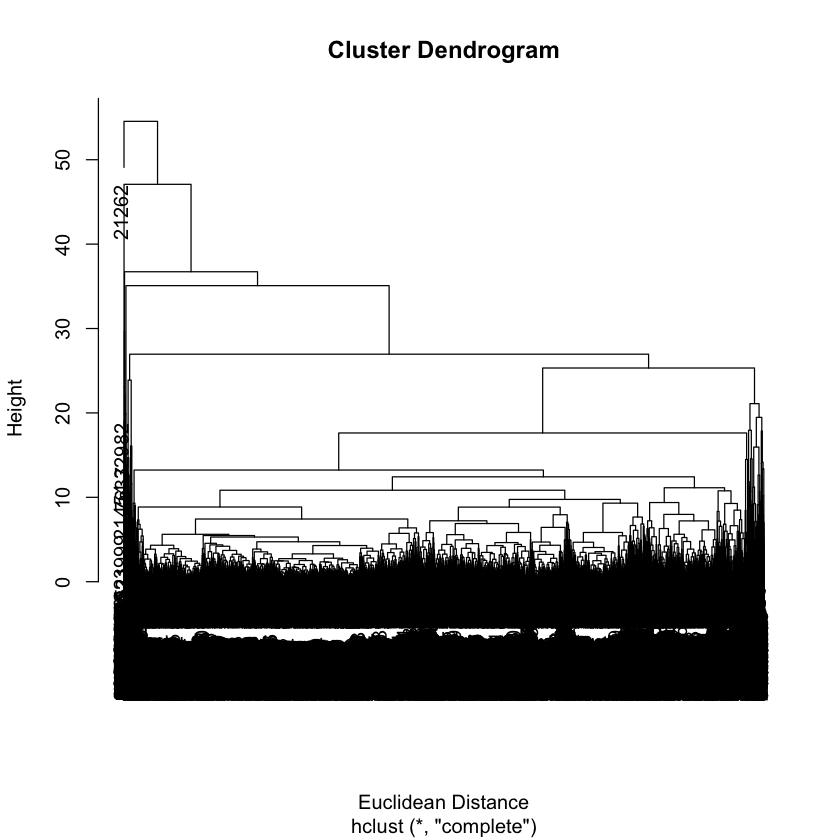

In [11]:
# # 讓圖形以一行兩欄的排版方式呈現，如要還原請用dev.off()
# par(mfrow=c(1,1))
 
# # 將以上資料間距離作為參數投入階層式分群函數：hclust()


# # 使用歐式距離進行分群
# dev.off() # 還原圖形的格式
h.E.cluster <- hclust(E.dist)
plot(h.E.cluster, xlab="Euclidean Distance")

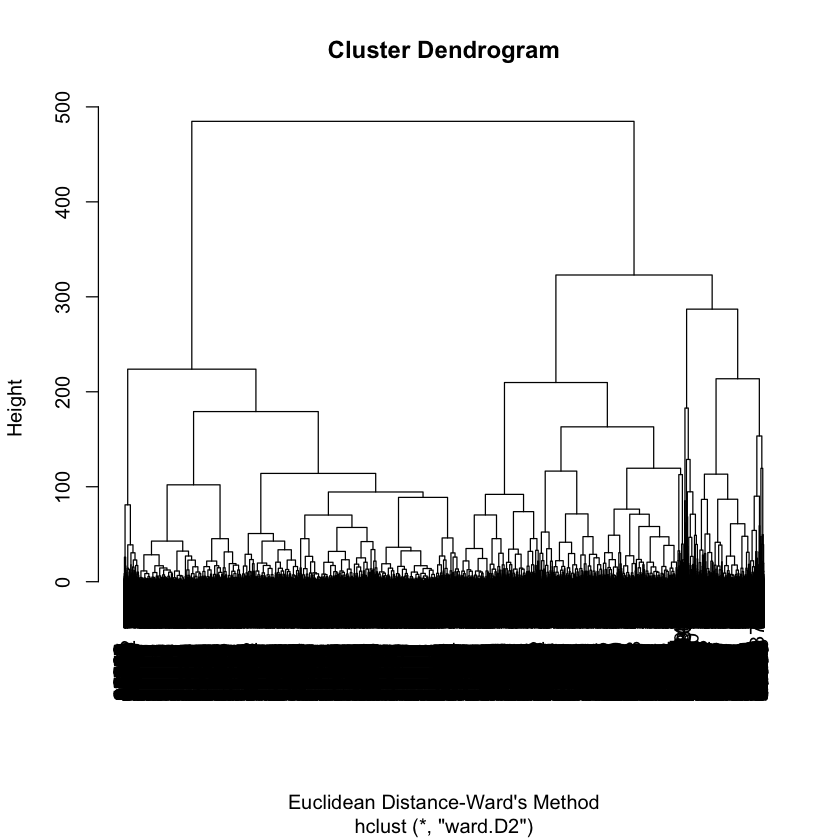

In [12]:
# 歐式-華德法(華德法：最小變異聚合演算法)
plot(hclust(E.dist, method="ward.D2"), xlab = "Euclidean Distance-Ward's Method")  

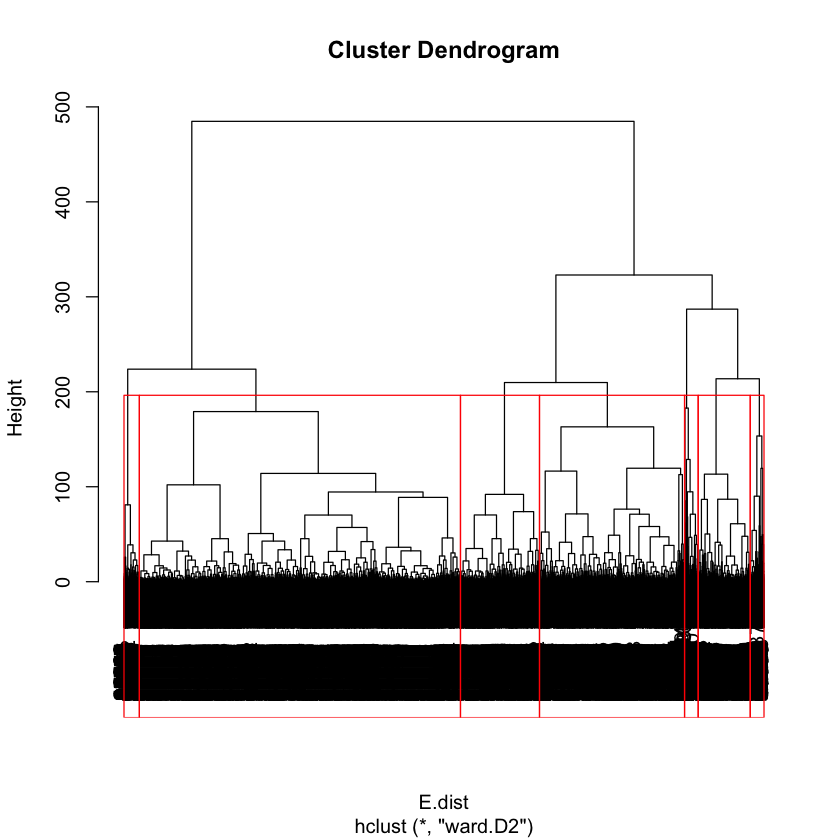

In [10]:
# 用指定分群數截枝
h.E.Ward.cluster <- hclust(E.dist, method="ward.D2")
plot(h.E.Ward.cluster)
rect.hclust(tree =h.E.Ward.cluster, k = 7, border = "red")
# rect.hclust(tree =h.E.Ward.cluster, k = 9, border = "blue")

In [ ]:
# 用指定位置來截枝
# h.E.Ward.cluster <- hclust(E.dist, method="ward.D2")
# plot(h.E.Ward.cluster)
# rect.hclust(tree =h.E.Ward.cluster, h = 4, border = "red")
# rect.hclust(tree =h.E.Ward.cluster, h = 10, border = "blue")

### Manhattan Distance

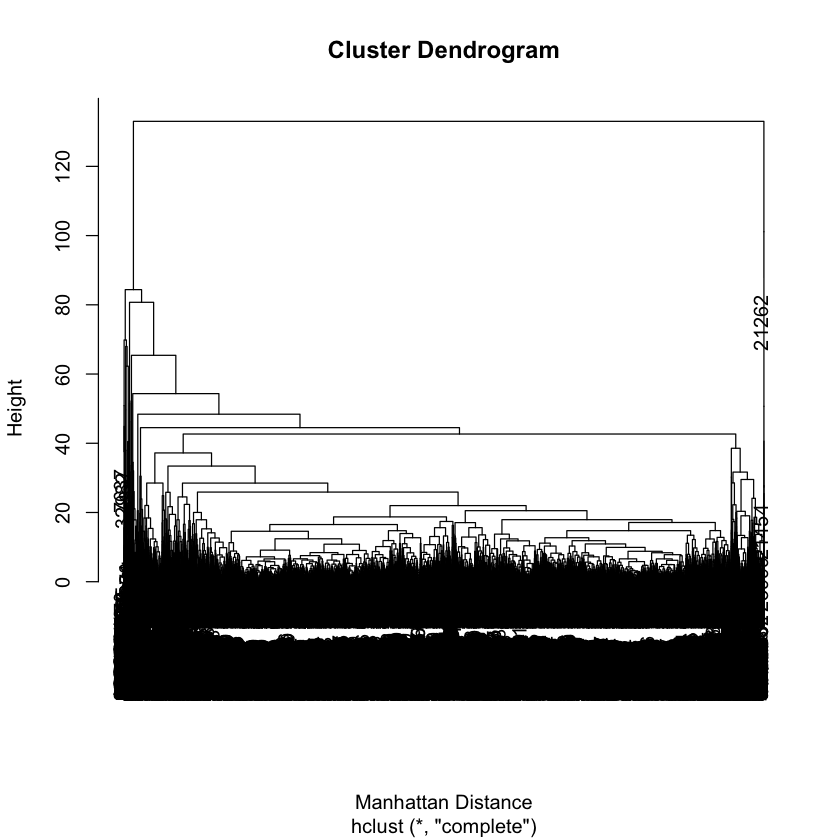

In [11]:
# par(mfrow=c(1,1))
# # 使用曼哈頓距離進行分群
h.M.cluster <- hclust(M.dist) 
plot(h.M.cluster, xlab="Manhattan Distance")

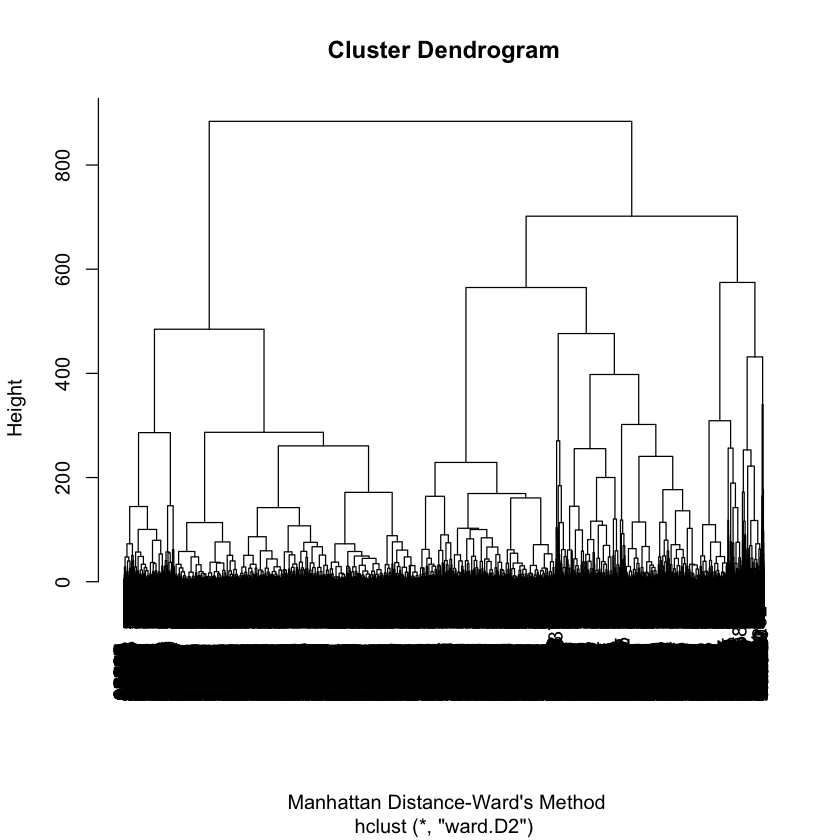

In [10]:
# 曼哈頓-華德法
plot(hclust(M.dist, method="ward.D2"), xlab = " Manhattan Distance-Ward's Method")  

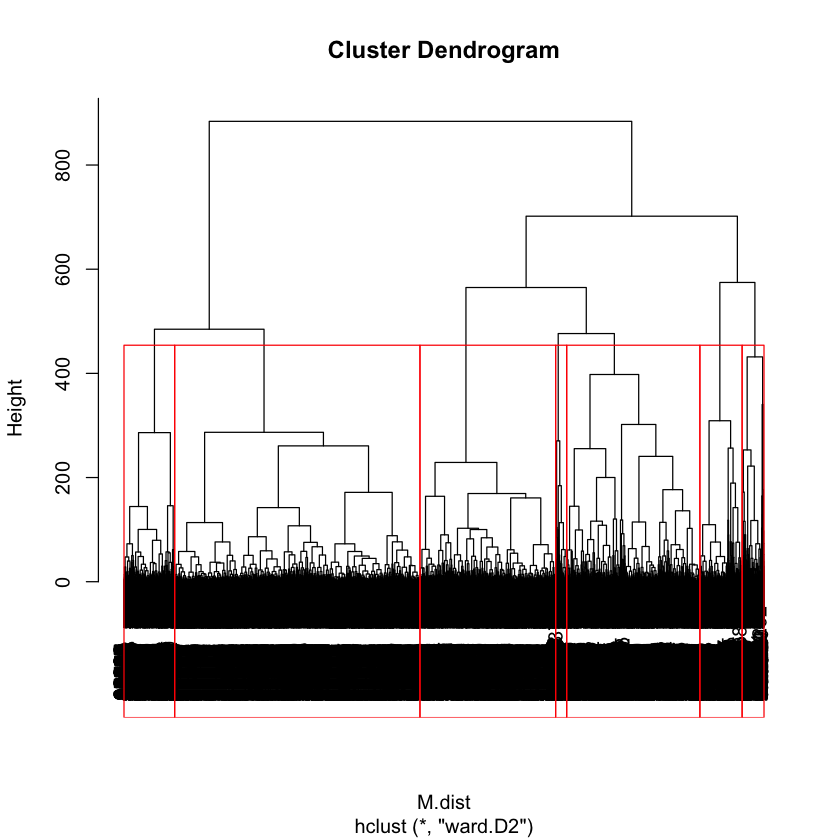

In [10]:
# 用指定分群數截枝
h.E.Ward.cluster <- hclust(M.dist, method="ward.D2")
plot(h.E.Ward.cluster)
rect.hclust(tree =h.E.Ward.cluster, k = 7, border = "red")
# rect.hclust(tree =h.E.Ward.cluster, k = 9, border = "blue")

In [ ]:
# 用指定位置來截枝
# h.E.Ward.cluster <- hclust(M.dist, method="ward.D2")
# plot(h.E.Ward.cluster)
# rect.hclust(tree =h.E.Ward.cluster, h = 4, border = "red")
# rect.hclust(tree =h.E.Ward.cluster, h = 10, border = "blue")

## 2. DIANA, top-down 分裂式

In [ ]:
dataD<-Data

In [ ]:
# compute divisive hierarchical clustering
diana_clust <- diana(dataD)

In [ ]:
# Divise coefficient; amount of clustering structure found
diana_clust$dc

In [ ]:
# plot dendrogram
pltree(diana_clust, cex = 0.6, hang = -1, main = "Dendrogram of diana")

In [ ]:
# Cut diana() tree into 4 groups
diana_clust <- diana(dataD)
group <- cutree(diana_clust, k = 4)
group

In [ ]:
library(factoextra)
fviz_cluster(list(data = dataD, cluster = group))

## 階層式分群最佳群聚數

### Elbow Method

In [ ]:
fviz_nbclust(Data, FUN = hcut, method = "wss")

### Average Silhouette Method

In [ ]:
fviz_nbclust(x = Data,FUNcluster = hcut, method = "silhouette")

### Gap Statistic Method

In [ ]:
gap_stat <- clusGap(x = Data,FUNcluster = hcut, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)